<a href="https://colab.research.google.com/github/CodePool-soham/Data-Science/blob/main/MARVEL_COMICS_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## UPLOAD DATA

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Marvel_Comics.csv to Marvel_Comics.csv


## LOAD DATA

In [ ]:
import pandas as pd

df=pd.read_csv("Marvel_Comics.csv")
df.head()

,comic_name,active_years,issue_title,publish_date,issue_description,penciler,writer,cover_artist,Imprint,Format,Rating,Price
0,A Year of Marvels: April Infinite Comic (2016),(2016),A Year of Marvels: April Infinite Comic (2016) #1,"April 01, 2016",The Infinite Comic that will have everyone tal...,Yves Bigerel,Yves Bigerel,Jamal Campbell,Marvel Universe,Infinite Comic,Rated T+,Free
1,A Year of Marvels: August Infinite Comic (2016),(2016),A Year of Marvels: August Infinite Comic (2016...,"August 10, 2016","It’s August, and Nick Fury is just in time to ...",Jamal Campbell,"Chris Sims, Chad Bowers",NaN,Marvel Universe,Infinite Comic,NaN,Free
2,A Year of Marvels: February Infinite Comic (2016),(2016),A Year of Marvels: February Infinite Comic (20...,"February 10, 2016",Join us in a brand new Marvel comics adventure...,"Danilo S. Beyruth, M Mast",Ryan North,NaN,Marvel Universe,Infinite Comic,Rated T+,Free
3,A Year of Marvels: July Infinite Comic (2016),(2016),A Year of Marvels: July Infinite Comic (2016) #1,"June 29, 2016",Celebrating the Fourth of July is complicated ...,Juanan Ramirez,Chuck Wendig,Jamal Campbell,Marvel Universe,Infinite Comic,NaN,Free
4,A Year of Marvels: June Infinite Comic (2016),(2016),A Year of Marvels: June Infinite Comic (2016) #1,"June 15, 2016",Sam Alexander’s finding it hard to cope with t...,Diego Olortegui,Paul Allor,Jamal Campbell,Marvel Universe,Infinite Comic,NaN,Free


In [ ]:
df.tail()

,comic_name,active_years,issue_title,publish_date,issue_description,penciler,writer,cover_artist,Imprint,Format,Rating,Price
34987,Ziggy Pig - Silly Seal Comics (2019),(2019),Ziggy Pig - Silly Seal Comics (2019) #1,"March 06, 2019",NOT SO FUNNY WHEN IT HAPPENS TO YOU? Once they...,Jacob Chabot,"John Cerilli, Frank Tieri",Nic Klein,Marvel Universe,Comic,Parental Advisory,$3.99
34988,Zombie (2006),(2006),Zombie (2006) #4,"December 20, 2006",With a thousand zombies in front of him and tw...,Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,$3.99
34989,Zombie (2006),(2006),Zombie (2006) #3,"November 29, 2006",The hordes of zombies gathered outside the hig...,Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,$3.99
34990,Zombie (2006),(2006),Zombie (2006) #2,"October 25, 2006","For Simon Garth, it's come down to two very ba...",Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,$3.99
34991,Zombie (2006),(2006),Zombie (2006) #1,"September 27, 2006","Cash stolen from the botched bank job: $125,00...",Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,$3.99


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34992 entries, 0 to 34991
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   comic_name         34992 non-null  object
 1   active_years       34992 non-null  object
 2   issue_title        34466 non-null  object
 3   publish_date       34466 non-null  object
 4   issue_description  30395 non-null  object
 5   penciler           25482 non-null  object
 6   writer             27595 non-null  object
 7   cover_artist       12255 non-null  object
 8   Imprint            11684 non-null  object
 9   Format             32894 non-null  object
 10  Rating             12619 non-null  object
 11  Price              32894 non-null  object
dtypes: object(12)
memory usage: 3.2+ MB


# CHECKING MISSING VALUES

In [ ]:
df.isnull().sum()

,0
comic_name,0
active_years,0
issue_title,526
publish_date,526
issue_description,4597
penciler,9510
writer,7397
cover_artist,22737
Imprint,23308
Format,2098


# *Percentage of Missing Values*

In [ ]:
missing_percent = (df.isnull().sum()/len(df))*100
missing_percent =missing_percent.sort_values(ascending=False)
print(missing_percent)

Imprint              66.609511
cover_artist         64.977709
Rating               63.937471
penciler             27.177641
writer               21.139118
issue_description    13.137289
Format                5.995656
Price                 5.995656
issue_title           1.503201
publish_date          1.503201
comic_name            0.000000
active_years          0.000000
dtype: float64


### CLEANING **DATA**

In [ ]:

"""
The below code removes any rows from the dataset where issue_title or publish_date is missing (NaN).
These columns are critical (titles and dates are essential for identifying and analyzing comics), so we drop such rows completely."""

df=df.dropna(subset=['issue_title','publish_date'])


# Fill non-critical columns with appropriate values
df['Imprint'] = df['Imprint'].fillna('Unknown')
df['cover_artist'] = df['cover_artist'].fillna('Unknown')
df['Rating'] = df['Rating'].fillna('Unrated')
df['penciler'] = df['penciler'].fillna('Unknown')
df['writer'] = df['writer'].fillna('Unknown')
df['issue_description'] = df['issue_description'].fillna('No description')
df['Format'] = df['Format'].fillna('Unknown')
df['Price'] = df['Price'].fillna('Unknown')

In [ ]:
print("Shape:",df.shape)
df.isnull().sum()

Shape: (34466, 12)


,0
comic_name,0
active_years,0
issue_title,0
publish_date,0
issue_description,0
penciler,0
writer,0
cover_artist,0
Imprint,0
Format,0


In [ ]:
df.describe()
"""
count->	Number of non-missing (non-null) values in that column
unique->	Number of distinct (unique) values in the column
top->	The most frequent value (the mode) in that column
freq->	Frequency/count of the most frequent value (how many times top occurs)"""

,comic_name,active_years,issue_title,publish_date,issue_description,penciler,writer,cover_artist,Imprint,Format,Rating,Price
count,34466,34466,34466,34466,34466,34466,34466,34466,34466,34466,34466,34466
unique,4418,350,33757,3317,29332,3916,3083,1011,40,12,37,54
top,Uncanny X-Men (1981 - 2011),(1968 - 1996),X-Men: The Complete Onslaught Epic Book 3 (Tra...,"November 30, -0001",No description,Unknown,Unknown,Unknown,Unknown,Comic,Unrated,Free
freq,588,718,10,543,4071,8984,6871,22211,22782,31899,21847,15136


# HEATMAP PUBLICATION INTENSITY OVER YEARS AND MONTHS

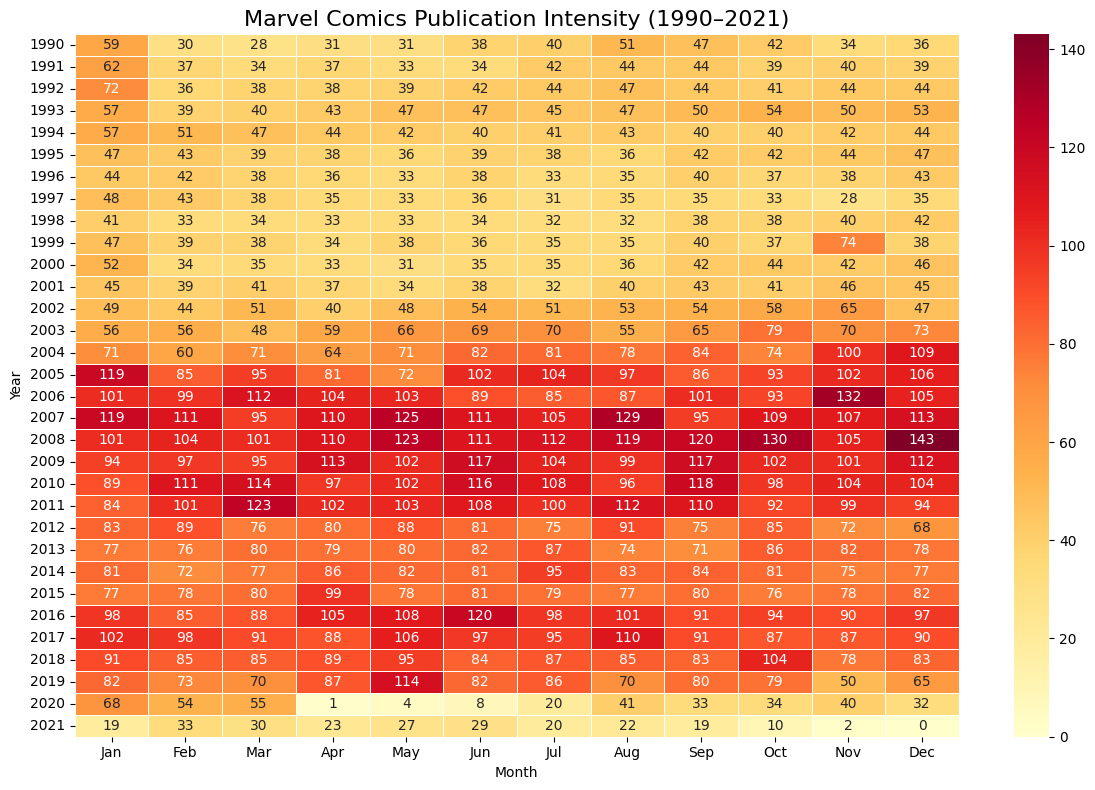

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure publish_date is datetime
df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce')
df = df.dropna(subset=['publish_date'])

# Extract year and month
df['year'] = df['publish_date'].dt.year
df['month'] = df['publish_date'].dt.month

# Filter years from 1990 to 2021
df_filtered = df[(df['year'] >= 1990) & (df['year'] <= 2021)]

# Create pivot table
heatmap_data = df_filtered.pivot_table(index='year', columns='month', values='issue_title', aggfunc='count').fillna(0)

# Month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
heatmap_data.columns = [month_names[m - 1] for m in heatmap_data.columns]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.5, annot=True, fmt='.0f')
plt.title('Marvel Comics Publication Intensity (1990–2021)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

# From the heatmap we can say in year 2008 month of DECEMBER MARVEL published the most number of comics.

# COMICS PRICE OVER THE YEARS

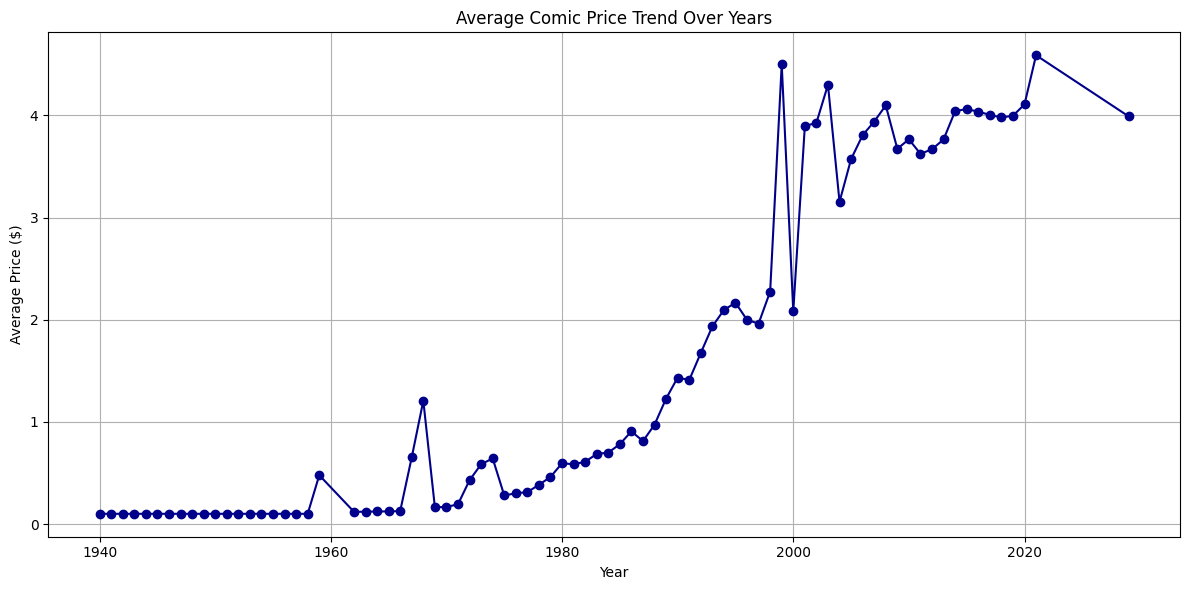

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Convert 'publish_date' to datetime if not done yet
df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce')

# Drop rows where publish_date or Price is missing
df_clean = df.dropna(subset=['publish_date', 'Price']).copy()

# 2. Clean the 'Price' column:
# Remove any non-numeric characters like '$' or spaces and convert to float
df_clean['Price'] = df_clean['Price'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
df_clean['Price'] = pd.to_numeric(df_clean['Price'], errors='coerce')

# Drop rows where price conversion failed
df_clean = df_clean.dropna(subset=['Price'])

# 3. Extract year from publish_date
df_clean['year'] = df_clean['publish_date'].dt.year

# 4. Group by year and calculate average price
price_trends = df_clean.groupby('year')['Price'].mean().reset_index()

# 5. Plot the average price trend over years
plt.figure(figsize=(12,6))
plt.plot(price_trends['year'], price_trends['Price'], marker='o', color='darkblue')
plt.title('Average Comic Price Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Who wrote the most number of comics?

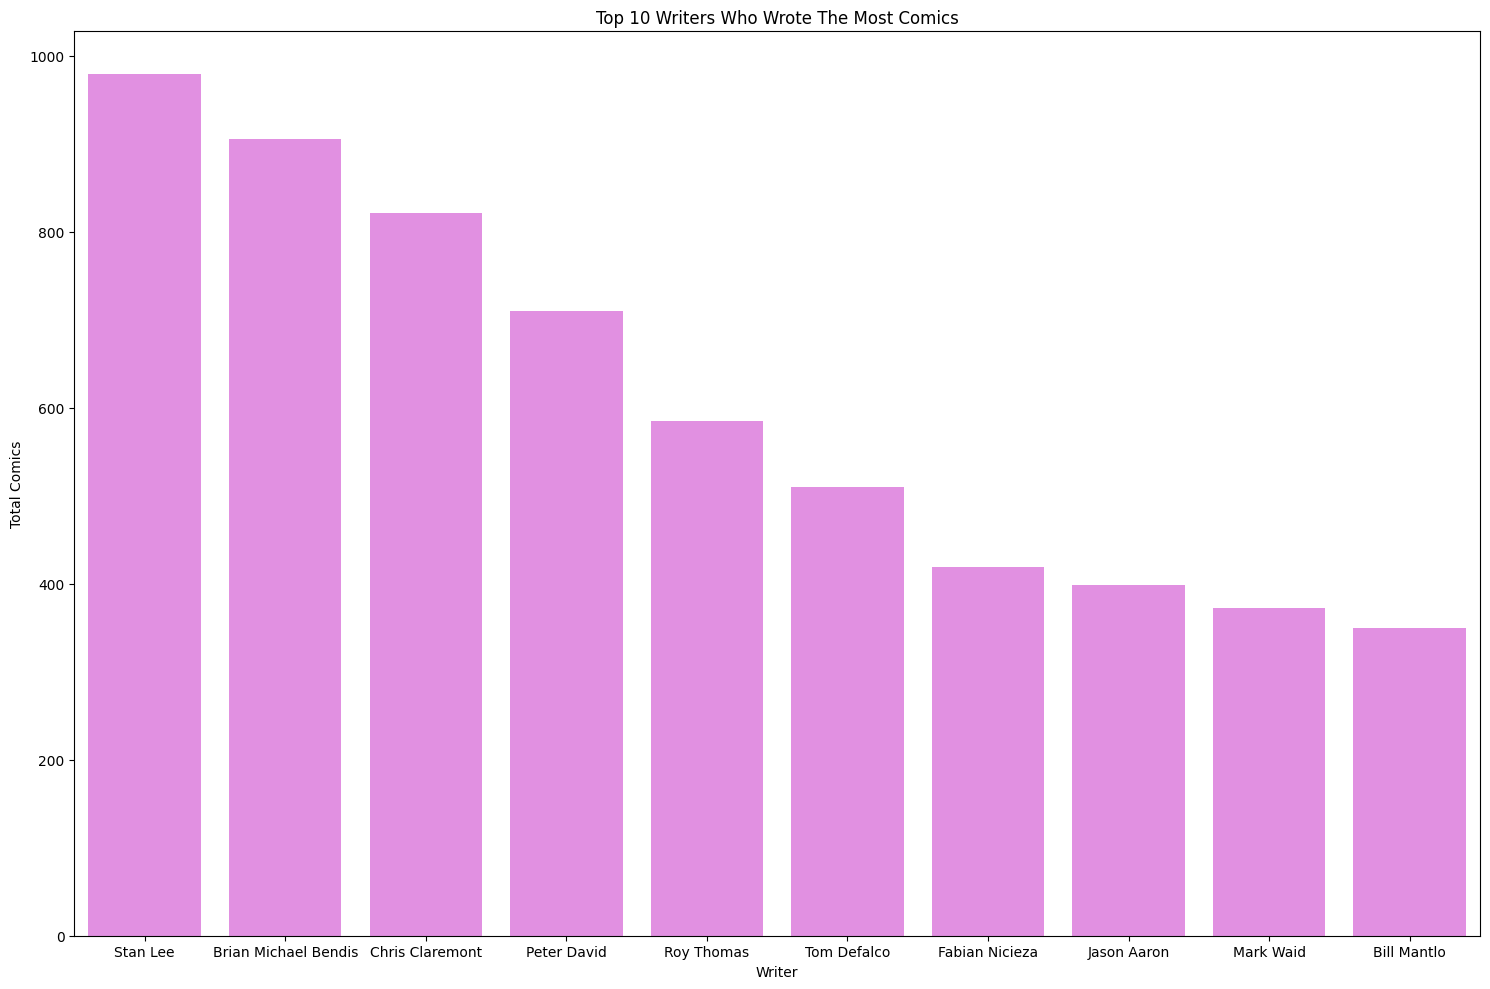

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample function to parse comma-separated writer strings
def parse_column(series):
    from collections import Counter
    all_writers = []

    for entry in series.dropna():
        # Split multiple writers, remove extra spaces
        writers = [w.strip() for w in entry.split(',') if w.strip()]
        all_writers.extend(writers)

    # Count occurrences of each writer
    writer_counts = Counter(all_writers)

    # Convert to DataFrame
    writer_df = pd.DataFrame(writer_counts.items(), columns=['writer', 'total'])
    writer_df = writer_df.sort_values(by='total', ascending=False).reset_index(drop=True)

    return writer_df

# 1. Filter non-null writers
mask = df['writer'].notnull()
writer_df = df['writer'][mask]

# 2. Parse and count
writer_stats = parse_column(writer_df)

# 3. Plot Top 30 writers
plt.figure(figsize=(15, 10))
sns.barplot(x='writer', y='total', data=writer_stats.head(10), color='violet')
plt.title('Top 10 Writers Who Wrote The Most Comics')
plt.ylabel('Total Comics')
plt.xlabel('Writer')
plt.tight_layout()
plt.show()

# The barplot shows Stan Lee wrote the most number of comics

# WHO WROTE MORE SPIDER MAN COMICS?

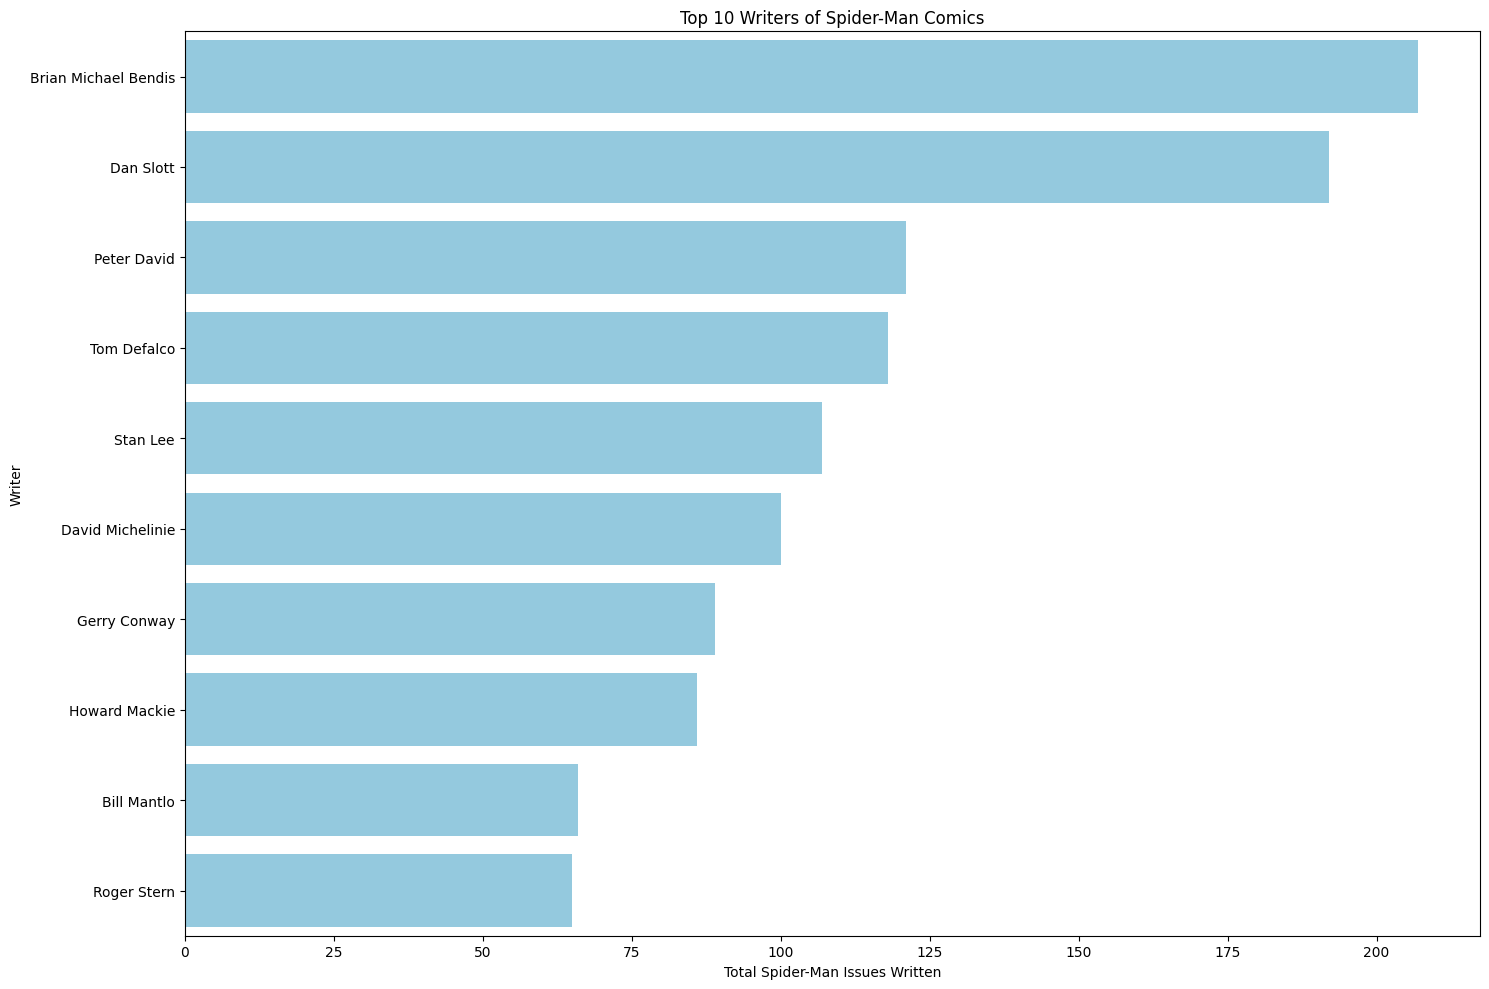

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Function to parse and count multiple writers per issue
def parse_column(series):
    all_writers = []

    for entry in series.dropna():
        writers = [w.strip() for w in entry.split(',') if w.strip()]
        all_writers.extend(writers)

    writer_counts = Counter(all_writers)
    writer_df = pd.DataFrame(writer_counts.items(), columns=['writer', 'total'])
    writer_df = writer_df.sort_values(by='total', ascending=False).reset_index(drop=True)

    return writer_df

# 1. Filter for Spider-Man comics
spiderman_df = df[df['comic_name'].str.contains('Spider-Man', case=False, na=False)]

# 2. Filter non-null writers
spiderman_writers_series = spiderman_df['writer'].dropna()

# 3. Parse and count individual writer names
spiderman_writer_stats = parse_column(spiderman_writers_series)

# 4. Plot top 30 Spider-Man writers
plt.figure(figsize=(15, 10))
sns.barplot(x='total', y='writer', data=spiderman_writer_stats.head(10), color='skyblue')
plt.title('Top 10 Writers of Spider-Man Comics')
plt.ylabel('Writer')
plt.xlabel('Total Spider-Man Issues Written')
plt.tight_layout()
plt.show()

#From the graph we can say Brian Michael Bendis has the written most number of spider man comics.

# Comics  vs Rating (Relation)

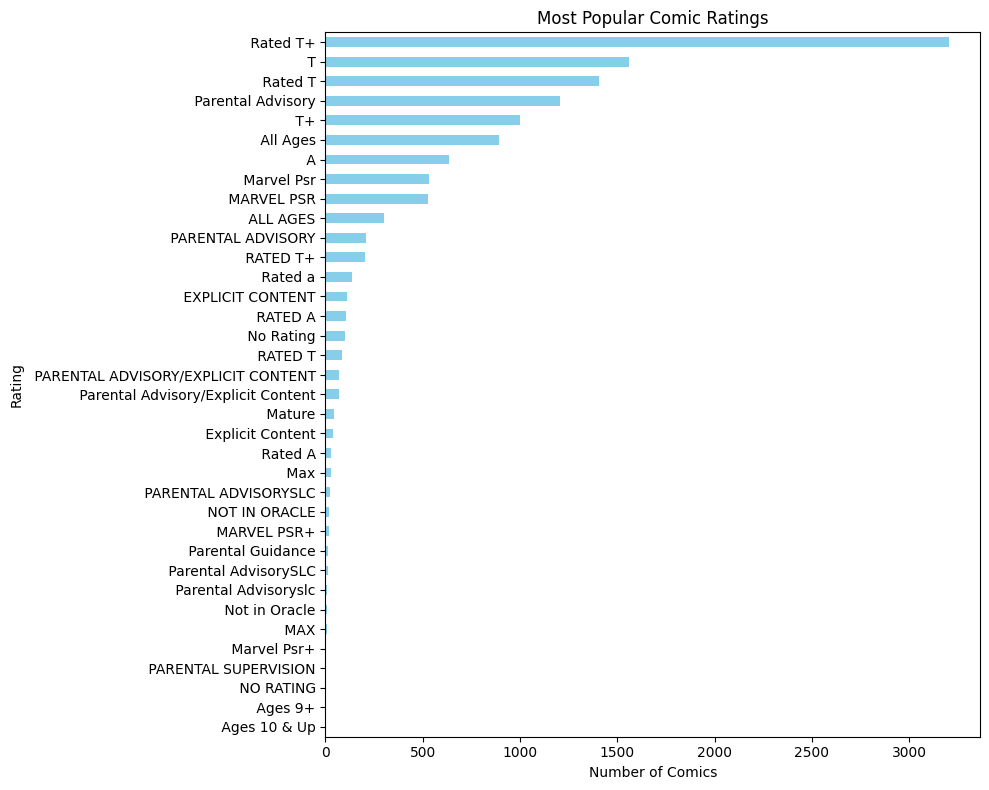

In [ ]:
import matplotlib.pyplot as plt

# Get value counts of each rating, dropping the topmost one if needed
rating_counts = df['Rating'].value_counts()

# Sort ascending for a nice horizontal bar chart
rating_counts = rating_counts.sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 8))
rating_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Comics')
plt.ylabel('Rating')
plt.title('Most Popular Comic Ratings')
plt.tight_layout()
plt.show()

#This tells us that the majority of marvel comic readers are teenagers.

# What is Marvel Comics' rate of publishing?

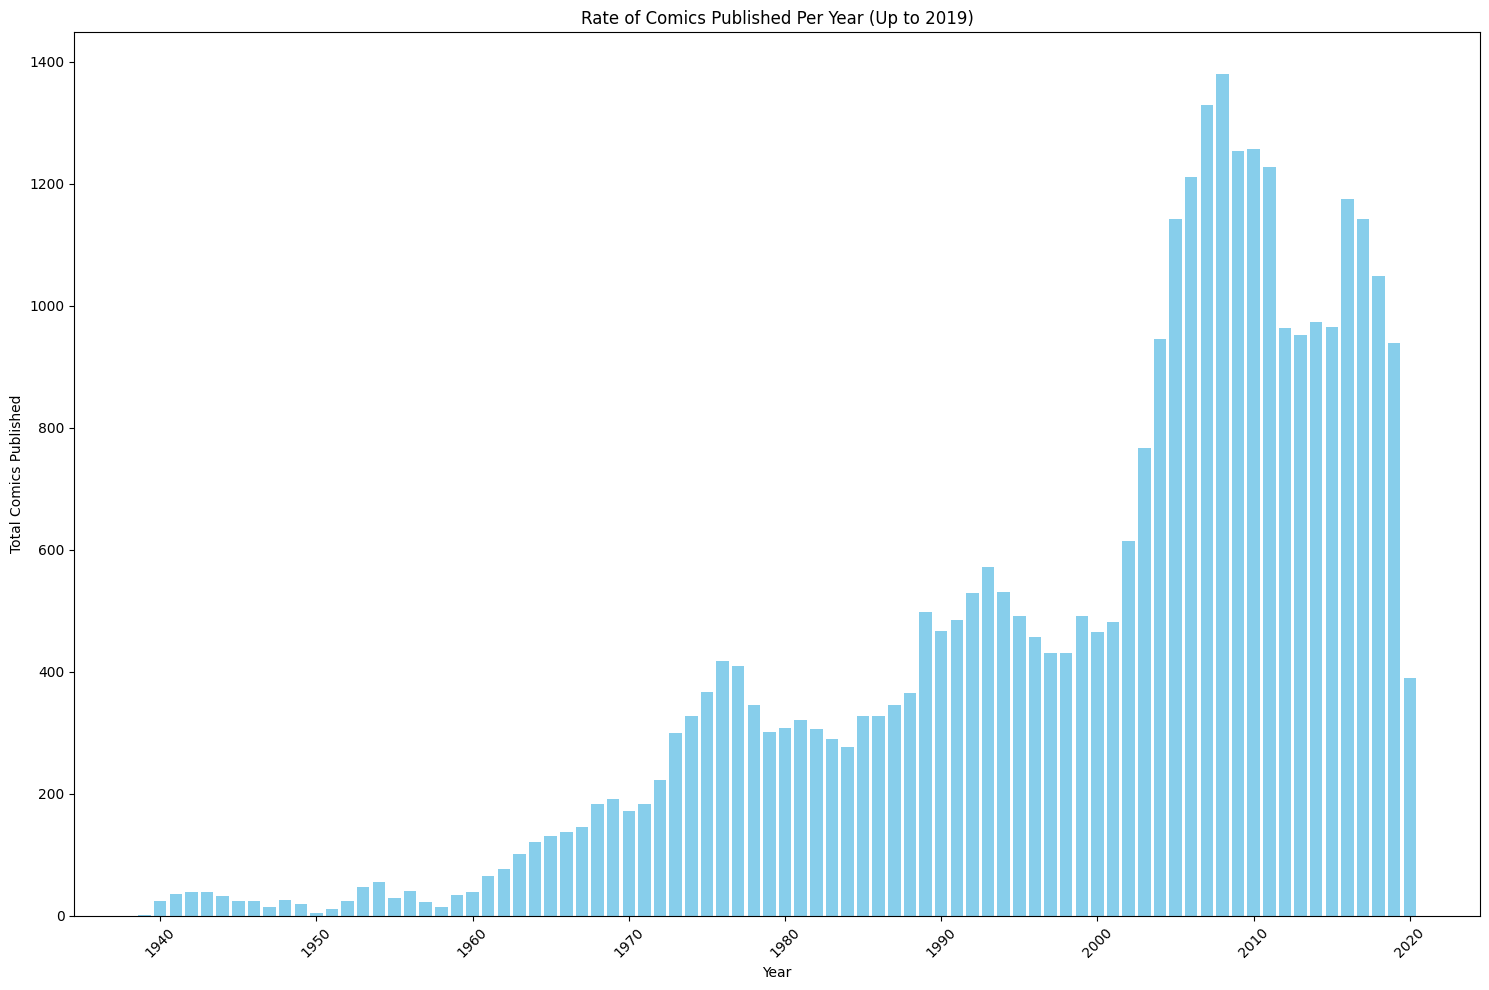

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'year' is numeric and drop invalid values
rate = df[df['year'].notnull()].copy()
rate['year'] = pd.to_numeric(rate['year'], errors='coerce')
rate = rate.dropna(subset=['year'])

# Filter for years up to 2020
rate = rate[rate['year'] <= 2020]

# Group by year and count issue_title
rate_grouped = rate.groupby('year')['issue_title'].count().reset_index()
rate_grouped = rate_grouped.sort_values('year')

# Plot
plt.figure(figsize=(15, 10))
plt.bar(rate_grouped['year'], rate_grouped['issue_title'], color='skyblue')
plt.title('Rate of Comics Published Per Year (Up to 2019)')
plt.xlabel('Year')
plt.ylabel('Total Comics Published')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#It appears that the rate of comic books published per year, has been increasing over the years. The rate of comics published is especially high between 2000 and 2020.

# How comic prices vary for different comic formats (like “comic,” “trade paperback,” “digital comic,” etc.).

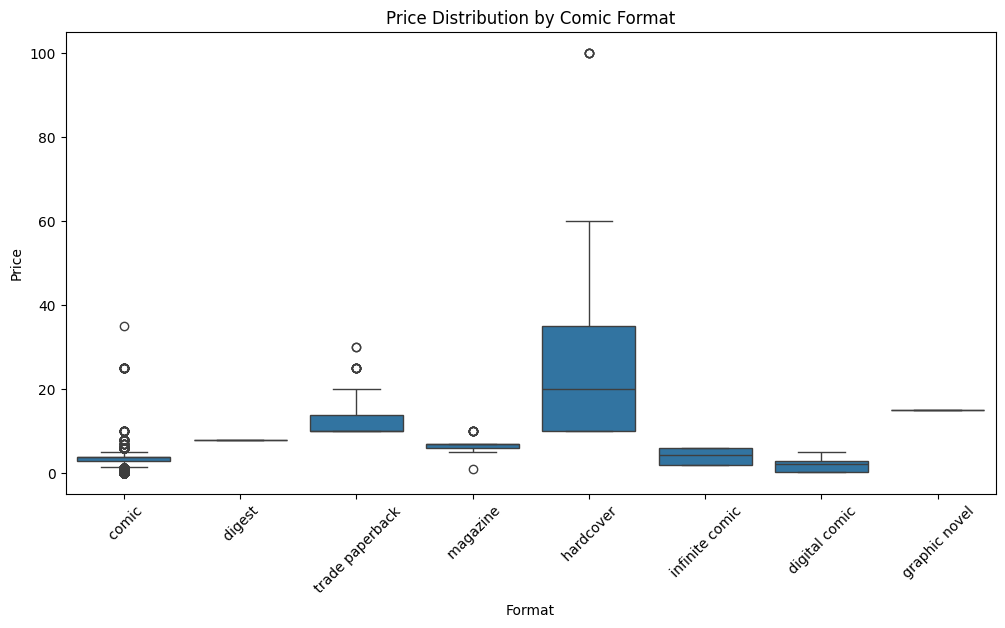

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with missing Price or Format
df_clean = df.dropna(subset=['Price', 'Format']).copy()

# Normalize format names to lowercase
df_clean['Format'] = df_clean['Format'].str.lower()

# Clean Price column and convert to numbers
df_clean['Price'] = df_clean['Price'].str.replace(r'[^0-9.]', '', regex=True)
df_clean['Price'] = pd.to_numeric(df_clean['Price'], errors='coerce')

# Drop rows where Price is NaN after conversion
df_clean = df_clean.dropna(subset=['Price'])

# Keep top 10 most common formats
top_formats = df_clean['Format'].value_counts().nlargest(10).index
df_filtered = df_clean[df_clean['Format'].isin(top_formats)]

# Plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Format', y='Price', data=df_filtered)
plt.xticks(rotation=45)
plt.title('Price Distribution by Comic Format')
plt.show()


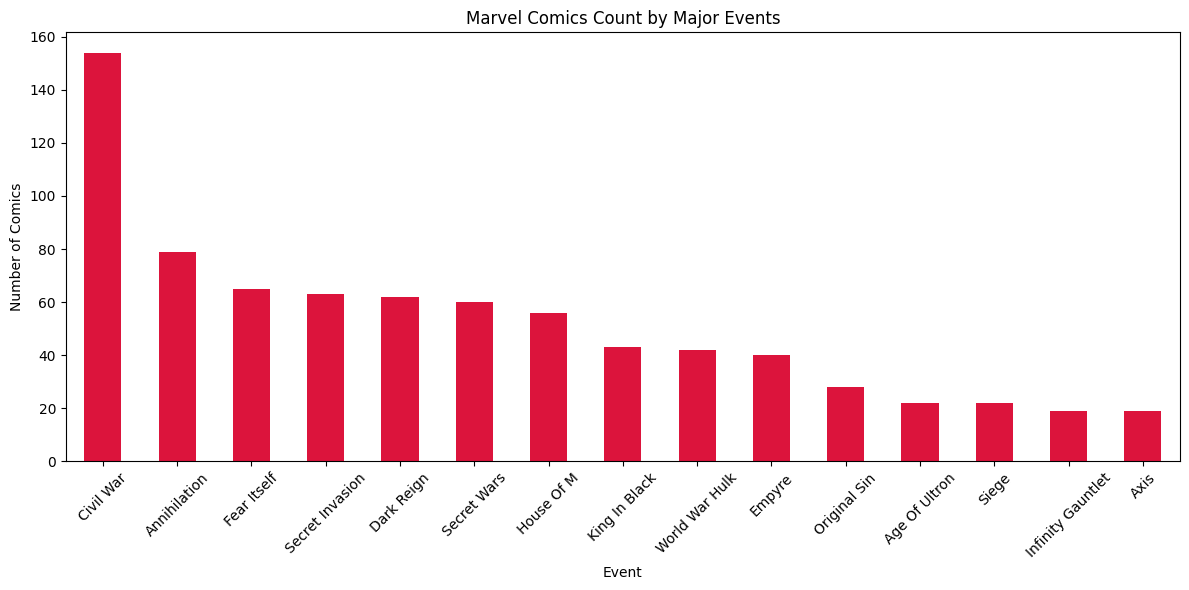

In [ ]:
# Define a list of known Marvel events (can expand this)
marvel_events = [
    'Civil War', 'Secret Wars', 'Infinity Gauntlet', 'House of M', 'Avengers vs X-Men',
    'Fear Itself', 'Secret Invasion', 'World War Hulk', 'Age of Ultron', 'Dark Reign',
    'Siege', 'Annihilation', 'Original Sin', 'AXIS', 'Empyre', 'King in Black'
]

# Convert event names to lowercase for comparison
events_lower = [event.lower() for event in marvel_events]

# Function to check if any event is in a string
def match_event(text):
    if pd.isna(text):
        return None
    text = text.lower()
    for event in events_lower:
        if event in text:
            return event.title()  # return nicely formatted name
    return None

# Apply to comic_name and issue_title
df['event_match'] = df['comic_name'].apply(match_event)
df['event_match'].fillna(df['issue_title'].apply(match_event), inplace=True)

# Count the number of comics for each event
event_counts = df['event_match'].value_counts()

# Plot the top events
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
event_counts.plot(kind='bar', color='crimson')
plt.title('Marvel Comics Count by Major Events')
plt.xlabel('Event')
plt.ylabel('Number of Comics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
